Q1. Basic Data Understanding

In [46]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


In [47]:
# Read data from ‘reviews.csv’ and ‘products.csv’
product=pd.read_csv('product_data.csv')
review=pd.read_csv('reviews.csv')


In [48]:
#Print shape of both the dataframes

product.shape ,review.shape

((720, 10), (67986, 8))

In [49]:
#Print types of columns for both the dataframes

product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   asin           720 non-null    object 
 1   brand          716 non-null    object 
 2   title          720 non-null    object 
 3   url            720 non-null    object 
 4   image          720 non-null    object 
 5   rating         720 non-null    float64
 6   reviewUrl      720 non-null    object 
 7   totalReviews   720 non-null    int64  
 8   price          720 non-null    float64
 9   originalPrice  720 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 56.4+ KB


In [50]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67986 entries, 0 to 67985
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          67986 non-null  object 
 1   name          67984 non-null  object 
 2   rating        67986 non-null  int64  
 3   date          67986 non-null  object 
 4   verified      67986 non-null  bool   
 5   title         67972 non-null  object 
 6   body          67965 non-null  object 
 7   helpfulVotes  27215 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 3.7+ MB


Q2. Basic Data Analysis

In [51]:
#Drop all columns except: asin, rating, title, body from reviews

review.drop(columns = ['name', 'date','verified', 'helpfulVotes'],inplace=True)


In [52]:
#Drop all columns except: asin, brand from products 

 
product.drop( columns=['title','url','image','rating','reviewUrl','totalReviews','price','originalPrice'],inplace=True)
 

In [53]:
#Verify and drop all null values from both the tables 
review.isnull().any()

#title has null values

asin      False
rating    False
title      True
body       True
dtype: bool

In [54]:
review.dropna(subset=['title'],inplace=True)

In [55]:
product.isnull().any()

#brand has null values

asin     False
brand     True
dtype: bool

In [56]:
product.dropna(subset=['brand'],inplace=True)

In [57]:
# Merge both the tables on key ‘asin’ 

df=review.merge(product,how='inner',on='asin')

In [58]:
df.shape

(67772, 5)

In [59]:
# The total number of missing values in the dataframe
print (  "\nMissing values :  ", df.isnull().sum().values.sum()  )


Missing values :   16


In [60]:
#Check the statistical summary of ‘rating’ and share insights 

df['rating'].describe()

count    67772.000000
mean         3.807693
std          1.583196
min          1.000000
25%          3.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

<AxesSubplot:xlabel='rating', ylabel='Count'>

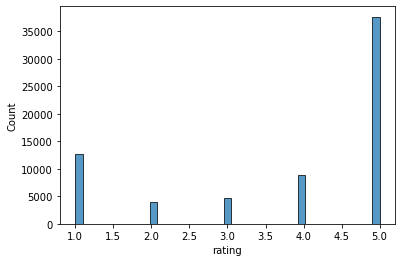

In [61]:
sns.histplot(df['rating'])

#The highest rating given is 5
#The average rating given is 4

<AxesSubplot:xlabel='rating', ylabel='count'>

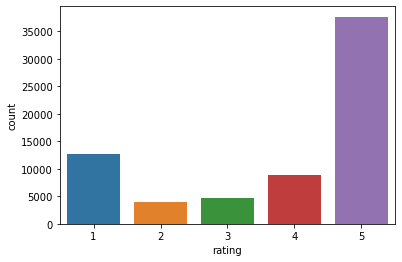

In [62]:
#Visualize a countplot for rating and share insights 

sns.countplot(x ='rating', data = df)

In [63]:
#Visualize distribution of ‘brand’ and share insights 
df.brand.value_counts()

Samsung     33616
Motorola     8880
Nokia        5915
Apple        5144
Xiaomi       4411
Google       3787
Sony         3196
HUAWEI       2225
OnePlus       347
ASUS          251
Name: brand, dtype: int64

<AxesSubplot:xlabel='brand', ylabel='count'>

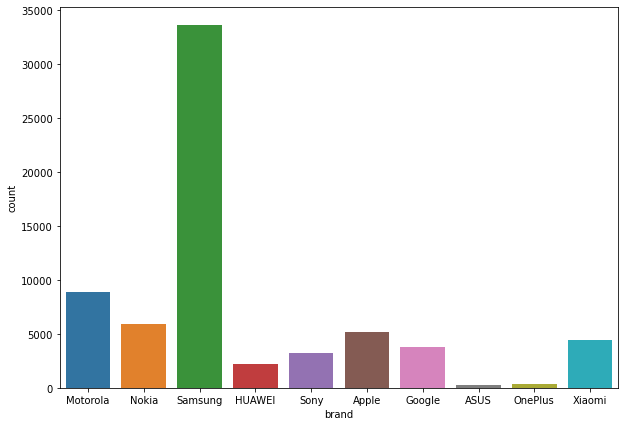

In [64]:

plt.figure(figsize=(10,7))
sns.countplot(x ='brand', data = df)

In [65]:
#Visualize distribution of ‘rating’ and share insights 
df.rating.value_counts()


5    37636
1    12713
4     8789
3     4738
2     3896
Name: rating, dtype: int64

Q3. Data Preparation 


Insert new Column in DataFrame ‘Sentiment’ and


Assign Sentiment= 1 when Rating >3;


Sentiment= -1 when Rating <3 and


Sentiment=  0 when rating = 3.


(This step is to create target class where 1 indicates positive sentiment, -1 indicates
negative sentiment and 0 indicates neutral sentiment)

In [66]:
conditions = [
    (df['rating'] < 3),
    (df['rating'] > 3),
    (df['rating'] == 3)
    ]

# create a list of the values we want to assign for each condition
values = ['-1', '1', '0']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Sentiment'] = np.select(conditions, values)

# display updated DataFrame
df.head(5)

,asin,rating,title,body,brand,Sentiment
0,B0009N5L7K,1,Stupid phone,DON'T BUY OUT OF SERVICE,Motorola,-1
1,B0009N5L7K,4,Exellent Service,I have been with nextel for nearly a year now ...,Motorola,1
2,B0009N5L7K,5,I love it,"I just got it and have to say its easy to use,...",Motorola,1
3,B0009N5L7K,1,Phones locked,1 star because the phones locked so I have to ...,Motorola,-1
4,B0009N5L7K,5,Excellent product,The product has been very good. I had used thi...,Motorola,1


Q4. Data Visualization

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

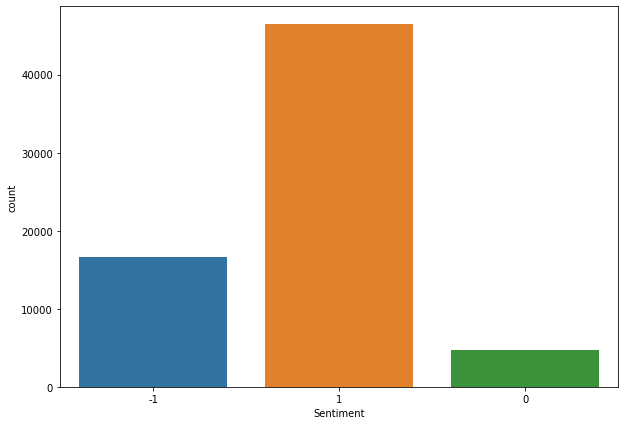

In [67]:
#Visualize distribution of ‘sentiment’ and share insights 

plt.figure(figsize=(10,7))
sns.countplot(x ='Sentiment', data = df)

In [68]:
#Visualize a crosstab of ‘brand’ with sentiment

In [69]:
pd.crosstab(df.brand,df.Sentiment,margins=True, margins_name="Total")

Sentiment,-1,0,1,Total
brand,,,,
ASUS,64,25,162,251
Apple,1434,322,3388,5144
Google,1169,267,2351,3787
HUAWEI,309,124,1792,2225
Motorola,2104,653,6123,8880
Nokia,1710,540,3665,5915
OnePlus,52,13,282,347
Samsung,8537,2292,22787,33616
Sony,770,280,2146,3196


<AxesSubplot:xlabel='Sentiment', ylabel='brand'>

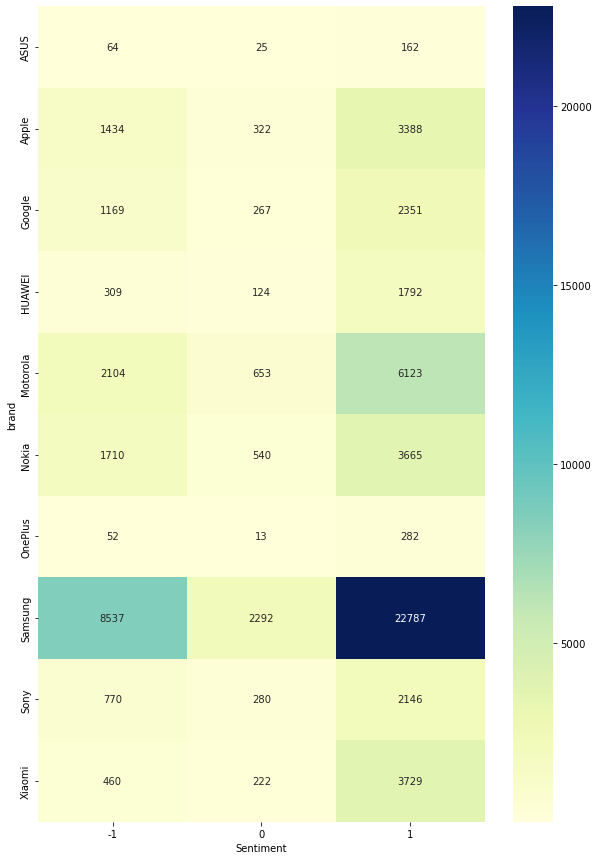

In [70]:
plt.figure(figsize=(10,15))
sns.heatmap(pd.crosstab(df.brand, df.Sentiment,), cmap="YlGnBu", annot=True,fmt='.5g' )

Q5. Textual Data Pre-processing


In [71]:
#Lowercase all data in columns ‘title’ and ‘body’

df["title"] = df["title"].str.lower()
df["body"] = df["body"].str.lower()

df.head(5)

,asin,rating,title,body,brand,Sentiment
0,B0009N5L7K,1,stupid phone,don't buy out of service,Motorola,-1
1,B0009N5L7K,4,exellent service,i have been with nextel for nearly a year now ...,Motorola,1
2,B0009N5L7K,5,i love it,"i just got it and have to say its easy to use,...",Motorola,1
3,B0009N5L7K,1,phones locked,1 star because the phones locked so i have to ...,Motorola,-1
4,B0009N5L7K,5,excellent product,the product has been very good. i had used thi...,Motorola,1


In [72]:
#Remove all punctuations from columns ‘title’ and ‘body’ 

df["title"] = df['title'].str.replace('[^\w\s]','')
df["body"] = df['body'].str.replace('[^\w\s]','')

C:\Users\asus\AppData\Local\Temp/ipykernel_8236/3443410143.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["title"] = df['title'].str.replace('[^\w\s]','')
C:\Users\asus\AppData\Local\Temp/ipykernel_8236/3443410143.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df["body"] = df['body'].str.replace('[^\w\s]','')


In [73]:
#Remove stopwords from columns ‘title’ and ‘body’
import nltk
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import re

#Function for data cleaning
Cstopwords=set(stopwords.words('english')+list(punctuation))
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()
def clean_data(data_column):
    data_corpus=[]    
    data=data_column
    #Data=BeautifulSoup(data,'lxml').text
    data=re.sub('[^a-zA-Z]',' ',data)
    data=str(data).lower()
    data=word_tokenize(data)
    #data=[stemmer.stem(w) for w in data if w not in Cstopwords]
    data=[lemma.lemmatize(w) for w in data ]
    data=' '.join(data)
    data_corpus.append(data)
    return data

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [74]:
title_column=df['title']
title_corpus=title_column.apply(clean_data)

In [75]:
title_column

0                                             stupid phone
1                                         exellent service
2                                                i love it
3                                            phones locked
4                                        excellent product
                               ...                        
67767       awesome phone but finger scanner is a big miss
67768                                       simply amazing
67769    great phon3 but many bugs need to fix still wa...
67770                                    phone is like new
67771                      outstanding phone for the price
Name: title, Length: 67772, dtype: object

In [76]:
df['body']=df['body'].apply(str)

In [77]:
body_column=df['body']
body_corpus=body_column.apply(clean_data)

In [78]:
body_column

0                                  dont buy out of service
1        i have been with nextel for nearly a year now ...
2        i just got it and have to say its easy to use ...
3        1 star because the phones locked so i have to ...
4        the product has been very good i had used this...
                               ...                        
67767    i love the camera on this phone the screen is ...
67768    ive been an xperia user for several years and ...
67769                           buy one more for my cousin
67770    product looks and works like new very much rec...
67771    i love the size and style of this phone it is ...
Name: body, Length: 67772, dtype: object

In [79]:
df['clean_title'] = title_corpus
df['clean_body'] = body_corpus

In [80]:
df.head(20)

,asin,rating,title,body,brand,Sentiment,clean_title,clean_body
0,B0009N5L7K,1,stupid phone,dont buy out of service,Motorola,-1,stupid phone,dont buy out of service
1,B0009N5L7K,4,exellent service,i have been with nextel for nearly a year now ...,Motorola,1,exellent service,i have been with nextel for nearly a year now ...
2,B0009N5L7K,5,i love it,i just got it and have to say its easy to use ...,Motorola,1,i love it,i just got it and have to say it easy to use i...
3,B0009N5L7K,1,phones locked,1 star because the phones locked so i have to ...,Motorola,-1,phone locked,star because the phone locked so i have to pay...
4,B0009N5L7K,5,excellent product,the product has been very good i had used this...,Motorola,1,excellent product,the product ha been very good i had used this ...
5,B0009N5L7K,1,warning,my problems with nextel did not stop when i ca...,Motorola,-1,warning,my problem with nextel did not stop when i can...
6,B0009N5L7K,5,nextel boost phone,great product that is as great for nextel as i...,Motorola,1,nextel boost phone,great product that is a great for nextel a it ...
7,B000SKTZ0S,4,nice but,i bought this phone to replace an lg phone tha...,Motorola,1,nice but,i bought this phone to replace an lg phone tha...
8,B000SKTZ0S,1,it seems it doesnt work with the existing att ...,i purchased this phone for my att phone replac...,Motorola,-1,it seems it doesnt work with the existing att ...,i purchased this phone for my att phone replac...
9,B000SKTZ0S,1,supply are needed,the phone did not come with a charger and didn...,Motorola,-1,supply are needed,the phone did not come with a charger and didn...


In [81]:
df.drop(columns = ['title', 'body'],inplace=True)


In [82]:
#Transform ‘body’ using TF-IDF vectorizer

#Feature Engineering using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer


In [83]:
tfidf=TfidfVectorizer(min_df=5, max_df=0.95, max_features = 20000, ngram_range = ( 1, 2 ),sublinear_tf = True)

In [84]:
tfidf=tfidf.fit(df['clean_body'])

In [85]:
X1=tfidf.transform(df['clean_body'])
X1.shape

(67772, 20000)

In [86]:
#Split data into X and Y. (Vectorized data should be X and sentiment should be Y.)

y=df['Sentiment'].values
y.shape

(67772,)

In [87]:
#Using the TF-IDF features on machine learning algorithms

X = X1

Q6. Model Building 


In [88]:
#Split data into 80% train and 20% test data
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(54217, 20000) (54217,)
(13555, 20000) (13555,)


In [91]:
#Build a Classification model to predict sentiment


#Implementing Logistic Based Regression model
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
model_lr=lr(random_state=0)
model_lr.fit(X_train,y_train)
y_pred_lr=model_lr.predict(X_test)
print('Accuracy for Logistic Regression :',accuracy_score(y_test,y_pred_lr))
print('Confusion matrix for Logistic Regression:\n',confusion_matrix(y_test,y_pred_lr))

Accuracy for Logistic Regression : 0.8749538915529325
Confusion matrix for Logistic Regression:
 [[2720   35  488]
 [ 358   76  478]
 [ 295   41 9064]]


C:\Users\asus\Anaconda3\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [94]:
#Print accuracy score for train and test data both 
print('Accuracy for Logistic Regression for test data :',accuracy_score(y_test,y_pred_lr))
yt_pred_lr=model_lr.predict(X_train)
print('Accuracy for Logistic Regression for train data:',accuracy_score(y_train,yt_pred_lr))

Accuracy for Logistic Regression for test data : 0.8749538915529325
Accuracy for Logistic Regression for train data: 0.9073906708228047


In [ ]:
#State whether model is underfitting / Overfitting / Good fit
